# 2 EXPLORATORY DATA ANALYSIS<a id='2_EXPLORATORY_DATA_ANALYSIS'></a>

 <b>2.1 Introduction <b/>

In this notebook we perform initial data quality check, data cleaning, familiriaze ourselves with the features of our data and perform basic statistical analysis.

 <b>2.2 Imports <b/>

Import relevant python data science packages that we will be utilizing throughout the project.

In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from yellowbrick.features import Rank2D

 <b>2.3 Load The Data <b/>

Load the project data to the notebook that is held in an excel file.

In [40]:
df = pd.read_excel('combined_cycle.xlsx')

 <b>2.4 Summary data <b/>

Check for feature data types, missing rows and data exploration.

In [41]:
df.shape

(9568, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [43]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [44]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


 <b>2.5 Visualizing High Dimensional Data <b/>

In order to visualize the different relationships between our features we perform transformations such as Principle Components Analysis and Heat Maps.

 <b>2.5.1 Scale The Data <b/>

The features are then scaled since the machine learning models that we will be using are sensitive to the magnitude of the features. We therefore have to normalize each feature so that each model contributes approximately proportionately to our model.

In [45]:
df_scale = scale(df)

In [46]:
df_columns = df.columns

In [47]:
num_rows, num_cols = df_scale.shape
print (num_rows, num_cols)

9568 5


In [48]:
df_scaled = pd.DataFrame(df_scale,columns=df_columns)

In [49]:
df_scaled.tail()

,AT,V,AP,RH,PE
9563,-0.402737,-0.363242,0.126450,1.211755,0.331944
9564,-0.867037,-1.190331,1.753131,-0.447205,0.893877
9565,1.565840,1.575811,-0.057099,-2.522618,-1.452881
9566,0.647976,1.191778,0.101191,-0.747901,-1.091345
9567,0.261507,0.646419,0.668677,-0.372545,-0.063577


 <b>2.5.1.1 Verifying The Scaling <b/>

Validating the scaling using mean and standard deviation

In [50]:
df_scaled.mean()

AT   -1.719813e-16
V    -2.600229e-16
AP    5.504864e-15
RH   -3.490855e-16
PE   -1.781940e-15
dtype: float64

In [51]:
df_scaled.std()

AT    1.000052
V     1.000052
AP    1.000052
RH    1.000052
PE    1.000052
dtype: float64

In [52]:
df_scaled.std(ddof=0)

AT    1.0
V     1.0
AP    1.0
RH    1.0
PE    1.0
dtype: float64

 <b>2.5.1.2 Calculate The PCA Transformation <b/>
   

In order to check on how many components are needed to explain the variance in the data. Fit the PCA transformation using the scaled data.

In [53]:
df_scaled_pca = PCA().fit(df_scaled)

Plot the cumulative variance ratio with number of components.

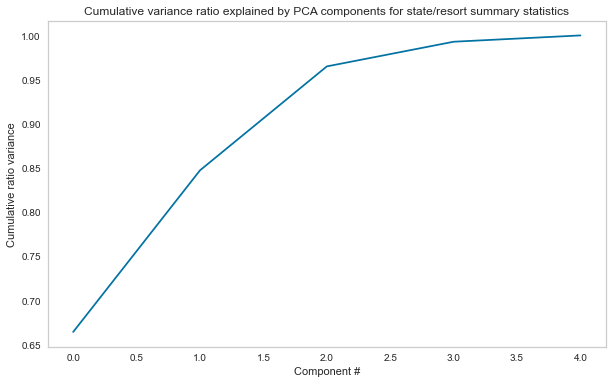

In [54]:
plt.subplots(figsize=(10, 6))
plt.plot(df_scaled_pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components explains roughly 85% of the cumulative variance.

In [55]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


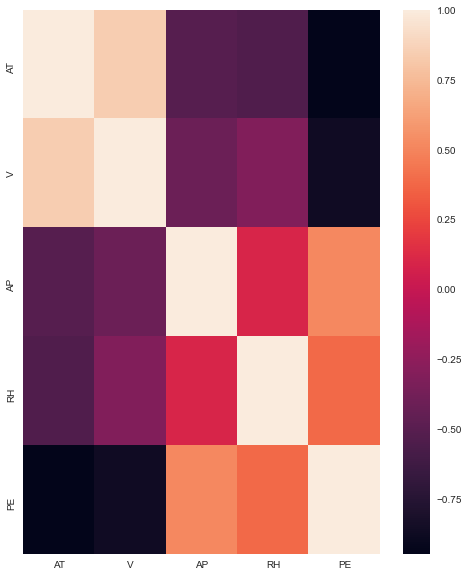

In [56]:
plt.subplots(figsize=(8,10))
sns.heatmap(df.corr());

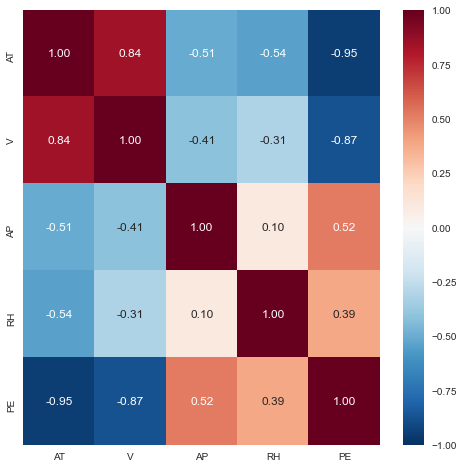

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(df.corr(),fmt=".2f",annot=True,ax=ax,cmap="RdBu_r",vmin=-1,vmax=1,)

In [58]:
y = df.iloc[:,-1:]
print(y)

          PE
0     463.26
1     444.37
2     488.56
3     446.48
4     473.90
...      ...
9563  460.03
9564  469.62
9565  429.57
9566  435.74
9567  453.28

[9568 rows x 1 columns]


In [59]:
X = df.loc[:, df.columns != 'PE']
print(X)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


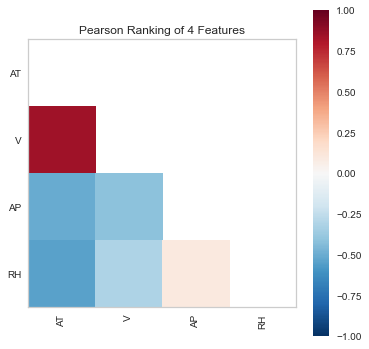

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
pcv = Rank2D( features = X.columns, algorithm= "pearson")
pcv.fit(X,y)
pcv.transform(X)
pcv.poof()


There is positive correlation between Atmospheric Temperature and Exhaust Vacuum. T

 <b>Summary <b/>


From the PCA analysis that two components can explain over 95% of the variance on the other hand from the heatmap we can
see that there is a strong correlation between electric energy output and relative humidity and ambient pressure.